Tristan Baudoux  
LMAPR1492 - tâche 8  
21/03/22  
Objectifs - Table des matières :

1. Téléchargement de la structure de bandes électroniques du matériau qui nous a été attribué : le Na2TlSb.  
  
  
2. Analyse de la structure de bandes électroniques.

2.1. Détermination de la bande interdite.

2.2. Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion et figure de la dispersion indiquée par des flèches.

2.3. Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

## Imports

In [174]:
from pymatgen import Structure
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display, Image
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants

from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure

## 1. Téléchargement de la structure de bandes électroniques du matériau qui nous a été attribué : le Na2TlSb.
Attention ici, on ne télécharge plus le matériau comme demandé dans les tâches précédentes mais on doit bien télécharger la structure de bandes électroniques de notre matériau.  Cela est rendu possible grâce au module importé ci-dessus : BandStructure. Pour afficher les résultats, on doit également utiliser un autre module appelé plotter (de pymatgen également) et sa classe BSPlotter.
La lecture de la documentation est essentielle à la résolution des tâches suivantes. Voici quelques liens utilisés :  
- https://pymatgen.org/pymatgen.electronic_structure.bandstructure.html
- https://pymatgen.org/_modules/pymatgen/electronic_structure/bandstructure.html
- https://pymatgen.org/pymatgen.electronic_structure.plotter.html
- https://github.com/materialsproject/pymatgen/blob/v2022.2.10/pymatgen/electronic_structure/plotter.py#L250-L905


Nous pouvons vérifier notre résultat de structure de bande sur MaterialsProject. Il semble bien correct.
Je n'arrive cependant pas à afficher l'axe des y au-delà de ~ 4. 

Structure de bandes électroniques du Na2TlSb : 


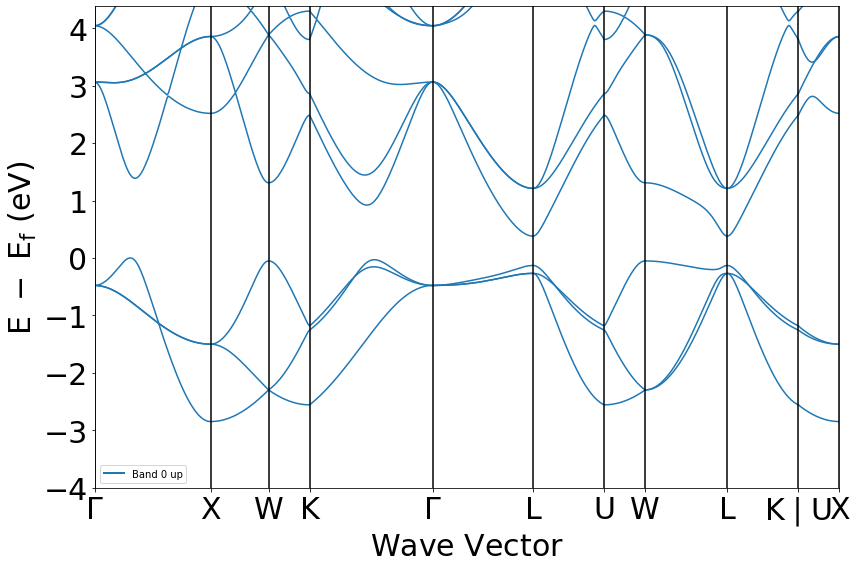

In [175]:
with MPRester("DX9Ul1PoZnBi6AJt") as m:

    # Structure de bande sur base de notre id de matériau : 
    bandStructure = m.get_bandstructure_by_material_id("mp-866132")

# Et pour afficher la structure de bandes électroniques :
print("Structure de bandes électroniques du Na2TlSb : ")

bsPlot = BSPlotter(bandStructure)
bsPlot.show()

## 2. Analyse de la structure de bandes électroniques.

### 2.1. Détermination de la bande interdite.

Cela est rendu possible grâce au module BandStructure et bsPlot. 

Structure de bandes électroniques du Na2TlSb avec sa bande interdite : (légende ci-dessous)


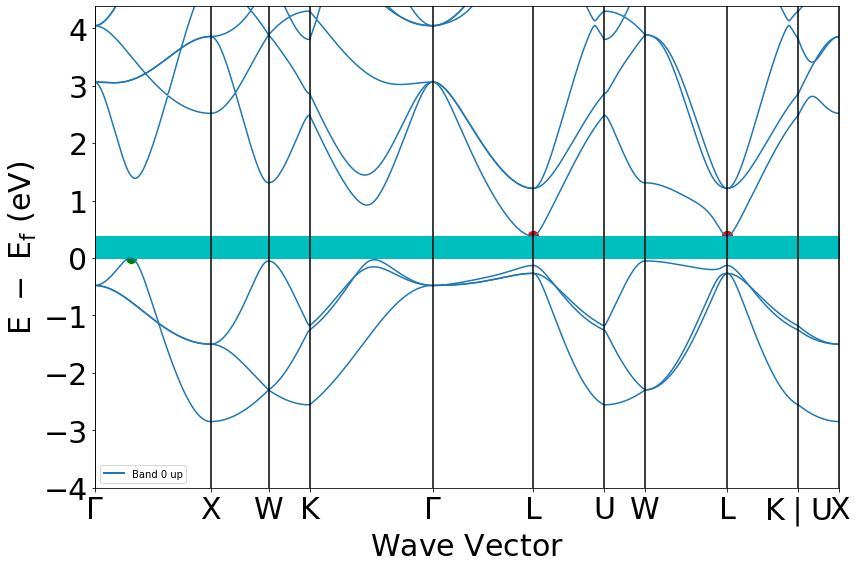

In [176]:
gap = bandStructure.get_band_gap()
energy = gap.get('energy') #énergie de la bande interdite

bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.fill_between(np.linspace(0, bsPlot.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, gap.get('energy'), color ='c')

print("Structure de bandes électroniques du Na2TlSb avec sa bande interdite : (légende ci-dessous)")


plt.show()

Légende : 
- Turquoise : bande interdite.
- Vert : maximum de la bande de valence.
- Rouge : minima de la bande de conduction.


Nous pouvons également, grâce aux différents modules, déterminer certaines caractéristiques de notre bande interdite :

In [177]:
print("Energie de la bande interdite : ", energy, "eV.")
print("Domaine de la bande interdite sur l'axe y (E - E_f) (en eV) : ", 0, " à ", energy, "eV.")
print("La bande interdite est-elle indirecte ou directe ?")
if gap.get('direct') == True:
    print('La bande interdite est ici directe.')
else:
    print('La bande interdite est ici indirecte.')

Energie de la bande interdite :  0.37970000000000015 eV.
Domaine de la bande interdite sur l'axe y (E - E_f) (en eV) :  0  à  0.37970000000000015 eV.
La bande interdite est-elle indirecte ou directe ?
La bande interdite est ici indirecte.


### 2.2. Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion et figure de la dispersion indiquée par des flèches.

Index de la 1ère bande de conduction :  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
Index de la dernière bande de valence :  defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})

Dispersion max de la bande de valence entre U-W: 3.8803598968435233

Dispersion min de la bande de valence entre W-L : -0.13531353127417692

Dispersion max de la bande de conduction entre L-K: 4.171526977363536

Dispersion min de la bande de conduction entre U-X : 0.1077020248924198


<function matplotlib.pyplot.show(close=None, block=None)>

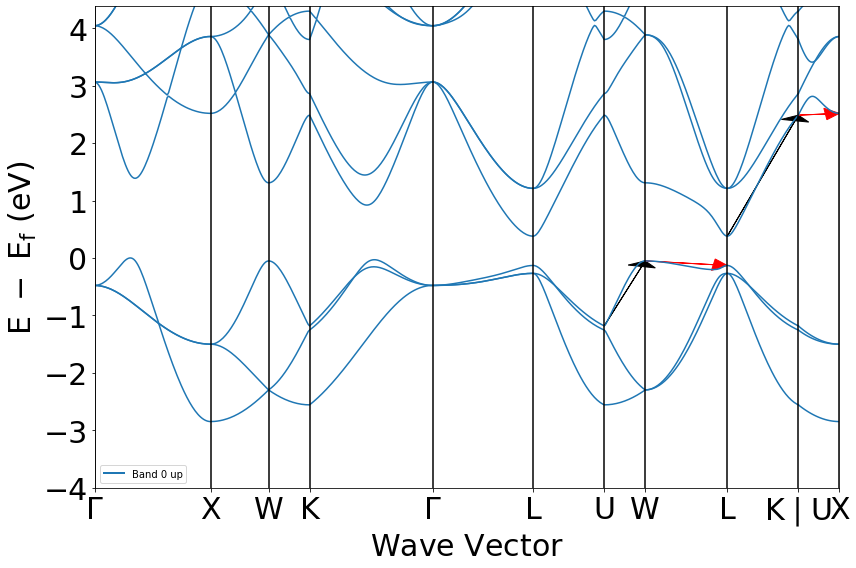

In [178]:
data = bsPlot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
energy2 = data.get("energy")

# BANDES DE VALENCE/CONDUCTION : 
#  1ère bande de conduction : 
cbm = bandStructure.get_cbm()
print("Index de la 1ère bande de conduction : ", cbm['band_index'])

#  Dernière bande de valence :
vbm = bandStructure.get_vbm()
print("Index de la dernière bande de valence : ", vbm['band_index'])


# DIFFERENCES SUR LES AXES : 
#  Axe des abscisses : 
deltaK=[]
indexDistance=[]
for i in range (len(distance)-1):
    if distance[i] != distance[i+1]:
        deltaK.append(distance[i+1]-distance[i])
        indexDistance.append(i)

#  Axe des ordonnées :
VDeltaE=[] #V pour valence
CDeltaE=[] #C pour conduction
for i in range (len(energy2.get('1'))):
    VDeltaE.append(energy2.get('1')[i][15][-1]-energy2.get('1')[i][15][0])
    CDeltaE.append(energy2.get('1')[i][16][-1]-energy2.get('1')[i][16][0])
#Chiffres 16 et 15 proviennent des index de la bande de conduction et de valence, respectivement.

# PENTES : 
VD = [] #Valence Dispersion
VAD = [] #Valence Absolute Dispersion 
CD = [] #Conduction Dispersion
CAD = [] #Conduction Absolute Dispersion
for i in range(len(deltaK)):
    VD.append(VDeltaE[i]/deltaK[i])
    VAD.append(abs(VD[i]))
    CD.append(CDeltaE[i]/deltaK[i])
    CAD.append(abs(CD[i]))
#print(VD, "|", VAD, "|", CD, "|", CAD)
#Les valeurs absolues permettent de comparer. 

## bande de valence : 
### pente max :
indexVMax= VAD.index(np.max(VAD))
VMax = VD[indexVMax]
print("\nDispersion max de la bande de valence entre U-W:",VMax)
#BIEN VERIFIER ENTRE QUOI ET QUOI !

### pente min :
indexVMin= VAD.index(np.min(VAD))
VMin = VD[indexVMin]
print("\nDispersion min de la bande de valence entre W-L :",VMin)

## bande de conduction : 
### pente max :
indexCMax= CAD.index(np.max(CAD))
CMax = CD[indexCMax]
print("\nDispersion max de la bande de conduction entre L-K:",CMax)
#BIEN VERIFIER ENTRE QUOI ET QUOI !

### pente min :
indexCMin= CAD.index(np.min(CAD))
CMin = CD[indexCMin]
print("\nDispersion min de la bande de conduction entre U-X :",CMin)

# Construction des flèches : 
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(distance[indexDistance[indexVMax]],energy2.get('1')[indexVMax][15][0],deltaK[indexVMax],VDeltaE[indexVMax],color='black',head_width = 0.2, head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMax]],energy2.get('1')[indexCMax][16][0],deltaK[indexCMax],CDeltaE[indexCMax],color='black',head_width = 0.2,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexVMin]],energy2.get('1')[indexVMin][15][0],deltaK[indexVMin],VDeltaE[indexVMin],color='red',head_width = 0.2,head_length = 0.1,length_includes_head=True)
plt.arrow(distance[indexDistance[indexCMin]],energy2.get('1')[indexCMin][16][0],deltaK[indexCMin],CDeltaE[indexCMin],color='red',head_width = 0.2,head_length = 0.1,length_includes_head=True)


plt.show

### 2.3. Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

Nous allons ici procéder de la manière suivante :  
- Nous savons que la formule de la masse effective est la suivante :  
(Formule tirée des slides de la partie de Monsieur Piraux, slide 9/37, cours 5)
Avec h barre qui est la constante de Planck. 

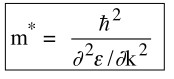

In [179]:
Image(filename='formule de la masse effective (slide 9_37 - cour 5).jpg')

Ensuite, 
- On détermine le point maximum pour la bande de valence et le point minimum pour la bande de conduction.
- La bande électronique est ici approximée par une équation du second degré qui décrit une parabole : a x^2 + b x + c.
Le sommet de cette parabole correspond au maxima trouvé précédemment. 

#### a) Masse effective au sommet de la dernière bande de valence :

In [180]:
# Données nécessaires : 

# Position min bande valence
xV = distance[indexDistance[1]]

# Energie de référence (càd l'énergie MAX de la bande de valence)
yV = 0

print("Coordonnées de la base de la première bande de valence : ", "(" , xV, ",", yV, ")")

# Utilisations d'un point proche pour obtenir les constantes dans l'équation : 
xppV = distance[indexDistance[1]] - deltaK[0]/(len(energy2.get('1')[0][15])-1)
#xppV = 0.26
yppV = energy2.get('1')[1][15][-2]
#yppV = 0.01

aV = (yppV-yV)/(xppV-xV)**2 
bV = -2*xV*aV
cV = yV+aV*xV*xV


print("Coordonnées du point proche : ", "(", xppV, ",", yppV, ")")
print("Constantes de l'équation du second degré :", "a =", aV,"| b =", bV,"| c =", cV)

Coordonnées de la base de la première bande de valence :  ( 0.8246141314954443 , 0 )
Coordonnées du point proche :  ( 0.8146790214774269 , -0.05620000000000003 )
Constantes de l'équation du second degré : a = -569.3652457901859 | b = 939.0132553219286 | c = -387.161800000001


Parabole de la 1ère bande de valence :   
Légende : 
- Parabole en rose.
- Point proche utilisé en orange.

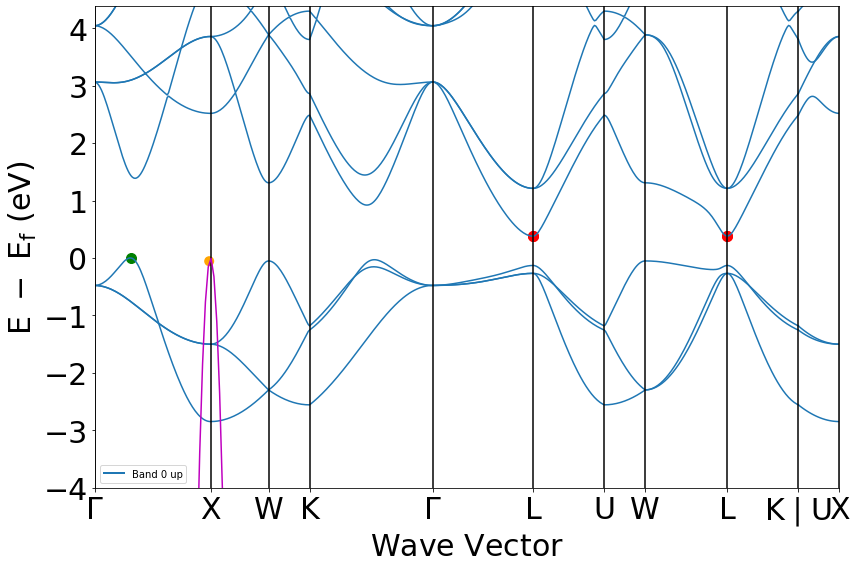

In [181]:
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True,smooth_tol=None)
polynomV = np.polynomial.polynomial.Polynomial([cV,bV,aV]) 
abscissesV = np.linspace(0,2,100)
ordonnéesV = np.zeros((100))
for i in range(0,100):
    ordonnéesV[i] = polynomV(abscissesV[i]) 
plt.scatter(xppV,yppV , c = "orange", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesV, ordonnéesV, color="m")

Je n'arrive pas à bien placer mon "point proche"... Il faudrait que je le décale vers le gauche sur Γ.

Enfin, nous pouvons calculer la valeur de la masse effective :

In [182]:
eV_J = 1.60218*10**(-19) #Conversion eV en Joule [kg*m^2/s^2]
Angstrom = 10**(-20) #Conversion des Angström^2 en m^2
hbar = constants.hbar #Constante de Planck [m^2*kg/s]

Vprime = 2*aV*eV_J*Angstrom
masse_effective_V = (hbar**2)/Vprime

print("Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a : ", 2*aV, " eV*A^2") 
print("Masse effective à la base de la bande de conduction : ", masse_effective_V, " kg")

Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a :  -1138.7304915803718  eV*A^2
Masse effective à la base de la bande de conduction :  -6.095650609847147e-33  kg


#### b) Masse effective à la base de la première bande de conduction :

In [183]:
# Données nécessaires : 

# Position min bande conduction
xC = distance[indexDistance[4]]
#print(xC)

# Energie bande interdite (càd l'énergie minimale de la bande de conduction)
yC = energy

print("Coordonnées de la base de la première bande de conduction : ", "(" , xC, ",", yC, ")")

# Utilisations d'un point proche pour obtenir les constantes dans l'équation : 
xppC = distance[indexDistance[4]] - deltaK[3]/(len(energy2.get('1')[3][16])-1)
yppC = energy2.get('1')[4][16][-2]

aC = (yppC-yC)/(xppC-xC)**2 
bC = -2*xC*aC
cC = yC+aC*xC*xC


print("Coordonnées du point proche : ", "(", xppC, ",", yppC, ")")
print("Constantes de l'équation du second degré :", "a =", aC,"| b =", bC,"| c =", cC )

Coordonnées de la base de la première bande de conduction :  ( 2.403101685728971 , 0.37970000000000015 )
Coordonnées du point proche :  ( 2.393162647474829 , 0.3809 )
Constantes de l'équation du second degré : a = 12.147657028544076 | b = -58.3841101659033 | c = 70.53117677973408


Parabole de la 1ère bande de conduction :   
Légende : 
- Parabole en rose.
- Point proche utilisé en orange.

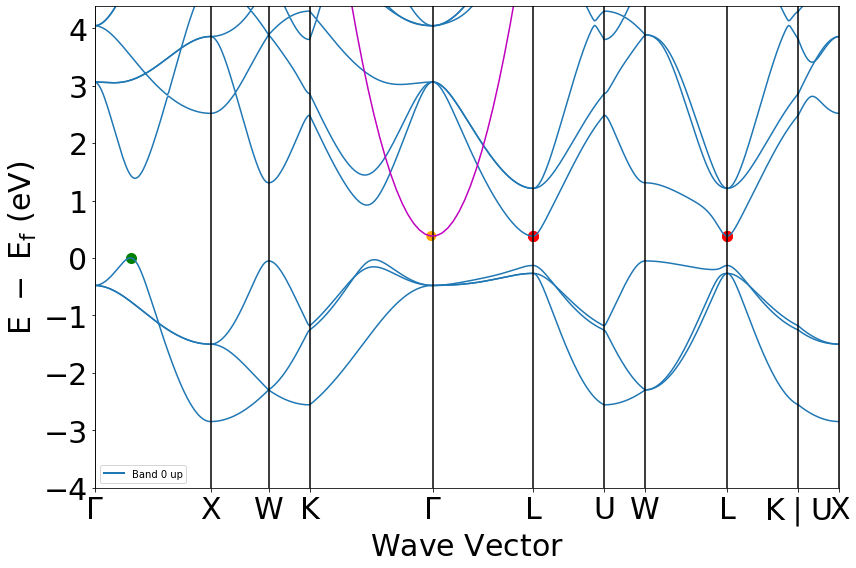

In [184]:
polynomC = np.polynomial.polynomial.Polynomial([cC,bC,aC]) 
abscissesC = np.linspace(1.5,5.5,100)
ordonnéesC = np.zeros((100))
for i in range(0,100):
    ordonnéesC[i] = polynomC(abscissesC[i]) 
bsPlot.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.scatter(xppC,yppC , c = "orange", s = 100, edgecolor = 'none', marker = 'o')
plt.plot(abscissesC, ordonnéesC, color="m")

J'ai un problème, mes 2 paraboles ne se construisent pas bien car je n'arrive pas à bien placer mon point proche ! :/ Cette dernière parabole semble cependant avoir une forme appropriée. Il "suffit" de la décaler vers la droite sur L.


Enfin, nous pouvons calculer la valeur de la masse effective :

In [185]:
eV_J = 1.60218*10**(-19) #Conversion eV en Joule [kg*m^2/s^2]
Angstrom = 10**(-20) #Conversion des Angström^2 en m^2
hbar = constants.hbar #Constante de Planck [m^2*kg/s]

Cprime = 2*aC*eV_J*Angstrom
masse_effective_C = (hbar**2)/Cprime

print("Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a : ", 2*aC, " eV*A^2") 
print("Masse effective à la base de la bande de conduction : ", masse_effective_C, " kg")


Dérivée seconde du polynôme ax^2+bx+c, donnée par 2*a :  24.295314057088152  eV*A^2
Masse effective à la base de la bande de conduction :  2.8570543270784804e-31  kg
